In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [2]:
dataset, info = tfds.load('cats_vs_dogs', split='train', as_supervised=True, with_info=True)

In [3]:
print(info)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='C:\\Users\\G35CG SKU3\\tensorflow_datasets\\cats_vs_dogs\\4.0.0',
    download_size=786.68 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Sa

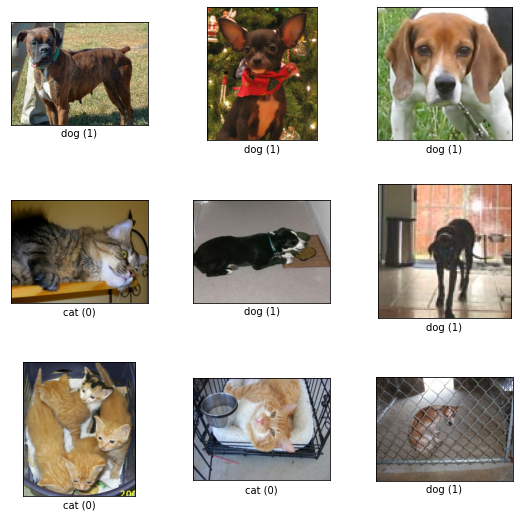

In [4]:
fig = tfds.show_examples(dataset, info)

In [5]:
ds_train, ds_val, ds_test = tfds.load('cats_vs_dogs', split=('train[:80%]', 'train[80%:90%]', 'train[90%:]'), as_supervised=True)

In [6]:
print(len(ds_train), len(ds_val), len(ds_test))

18610 2326 2326


In [7]:
def normalize_img(image, label):
  return tf.image.resize(image, (100, 100))/255.0, label

In [8]:
ds_train = ds_train.map(normalize_img).shuffle(len(ds_train)).batch(64)
ds_val = ds_val.map(normalize_img).batch(64)
ds_test = ds_test.map(normalize_img).batch(64)

In [9]:
#MLP
model = Sequential()
model.add(Flatten(input_shape=(100, 100, 3)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 32)                960032    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 966,369
Trainable params: 966,369
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(ds_train, epochs=50, validation_data=ds_val)

Epoch 1/50
291/291 [==============================] - 10s 16ms/step - loss: 0.7116 - accuracy: 0.5589 - val_loss: 0.6600 - val_accuracy: 0.6079
Epoch 2/50
291/291 [==============================] - 11s 19ms/step - loss: 0.6775 - accuracy: 0.5861 - val_loss: 0.6466 - val_accuracy: 0.6118
Epoch 3/50
291/291 [==============================] - 11s 19ms/step - loss: 0.6696 - accuracy: 0.5852 - val_loss: 0.6507 - val_accuracy: 0.6169
Epoch 4/50
291/291 [==============================] - 12s 22ms/step - loss: 0.6619 - accuracy: 0.5980 - val_loss: 0.6543 - val_accuracy: 0.6083
Epoch 5/50
291/291 [==============================] - 12s 20ms/step - loss: 0.6563 - accuracy: 0.6106 - val_loss: 0.6543 - val_accuracy: 0.6165
Epoch 6/50
291/291 [==============================] - 13s 24ms/step - loss: 0.6512 - accuracy: 0.6118 - val_loss: 0.6473 - val_accuracy: 0.6255
Epoch 7/50
291/291 [==============================] - 12s 22ms/step - loss: 0.6455 - accuracy: 0.6210 - val_loss: 0.6438 - val_accuracy:

In [11]:
#CNN
model2 = Sequential()
model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(100, 100, 3)))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)      

In [12]:
history2 = model2.fit(ds_train, epochs=50, validation_data=ds_val)

Epoch 1/50
291/291 [==============================] - 16s 22ms/step - loss: 0.6323 - accuracy: 0.6285 - val_loss: 0.5897 - val_accuracy: 0.6892
Epoch 2/50
291/291 [==============================] - 11s 24ms/step - loss: 0.5244 - accuracy: 0.7356 - val_loss: 0.4911 - val_accuracy: 0.7644
Epoch 3/50
291/291 [==============================] - 11s 23ms/step - loss: 0.4504 - accuracy: 0.7896 - val_loss: 0.4416 - val_accuracy: 0.8005
Epoch 4/50
291/291 [==============================] - 11s 23ms/step - loss: 0.3975 - accuracy: 0.8196 - val_loss: 0.4218 - val_accuracy: 0.8091
Epoch 5/50
291/291 [==============================] - 11s 24ms/step - loss: 0.3468 - accuracy: 0.8490 - val_loss: 0.4251 - val_accuracy: 0.8065
Epoch 6/50
291/291 [==============================] - 11s 24ms/step - loss: 0.3070 - accuracy: 0.8638 - val_loss: 0.4228 - val_accuracy: 0.8255
Epoch 7/50
291/291 [==============================] - 11s 24ms/step - loss: 0.2616 - accuracy: 0.8883 - val_loss: 0.4164 - val_accuracy:

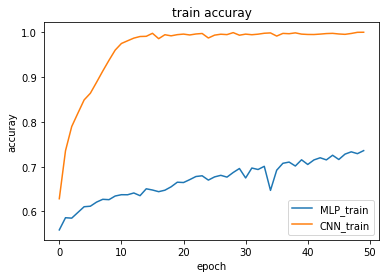

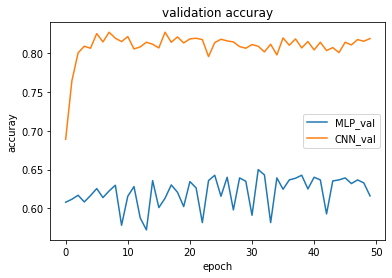

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('train accuray')
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['MLP_train', 'CNN_train'])
plt.show()

plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('validation accuray')
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['MLP_val', 'CNN_val'])
plt.show()


In [14]:
score = model.evaluate(ds_test)
score2 = model2.evaluate(ds_test)
print("MLP_score:", score)
print("CNN_score:", score2)

37/37 [==============================] - 1s 26ms/step - loss: 1.3704 - accuracy: 0.8319
MLP_score: [0.6519597172737122, 0.6478933691978455]
CNN_score: [1.3703575134277344, 0.8319002389907837]
